In [1]:
from findmycells.main import Project
from findmycells.quantifications import ReconstructCellsIn3DFrom2DInstanceLabels, CountCellsInWholeStructure
from findmycells.inspection import InspectUsingMultiMatchIDX

In [2]:
project_root_dir = '/mnt/c/Users/dsege/TEMP/findmycells_projects/TH_in_SN/'

In [3]:
user_input_via_gui = {'project_root_dir': project_root_dir,
                      'only_duplication': True}

In [4]:
th_in_sn = Project(user_input_via_gui)

In [5]:
all(th_in_sn.database.file_infos['quantification_completed'])

True

In [6]:
th_in_sn.database.file_infos['quantification_completed'][2] = False

In [7]:
th_in_sn.database.multi_matches_traceback.pop('0002')

{'final_label_id': [2015, 2001],
 'original_instance_label_id': [13, 16],
 'plane_index': [1, 2]}

In [8]:
th_in_sn.database.multi_matches_traceback['0002']

KeyError: '0002'

In [9]:
th_in_sn.run_quantifications(file_ids = ['0002'])

Quantification of file ID: 0002 (1/1)
--matching ROIs across planes (1/8)
--matching ROIs across planes (2/8)
--matching ROIs across planes (3/8)
--matching ROIs across planes (4/8)
--matching ROIs across planes (5/8)
--matching ROIs across planes (6/8)
--matching ROIs across planes (7/8)
--matching ROIs across planes (8/8)
--quantifying reconstructed cells in 3D within region of interest


4779 5179 -137 263
0


ValueError: zero-size array to reduction operation minimum which has no identity

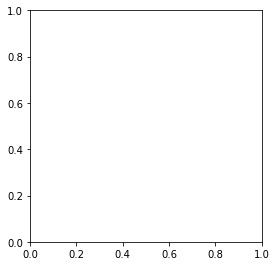

In [11]:
th_in_sn.run_inspection('0002', InspectUsingMultiMatchIDX(multi_match_index=1, reconstruction_strategy='2D', save=False, show=True))

In [ ]:
from findmycells.utils import load_zstack_as_array_from_single_planes
from findmycells.inspection import InspectReconstructedCells2D

zstack = load_zstack_as_array_from_single_planes(path = th_in_sn.database.inspection_final_label_planes_dir, file_id = '0002')

inspector = InspectReconstructedCells2D(plane_id_of_interest = 1, 
                                        label_id_of_interest = 2015, 
                                        zstack_with_label_id_of_interest = zstack, 
                                        save=False, show=True)

In [ ]:
zstack = load_zstack_as_array_from_single_planes(path = th_in_sn.database.preprocessed_images_dir, file_id = '0002')

In [ ]:
inspector.run(database = th_in_sn.database, file_id = '0002')

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(zstack[2])

In [ ]:
th_in_sn.save_status()

# Code development

## Statistical analyses: